# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#lists to store data
city_name = []
max_temp = []
humid = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lon = []
counter = 0
set_count = 1

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"]) 
        max_temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        if counter > 49:
            counter = 0
            set_count = set_count + 1
    
        else:
            counter = counter + 1
            
        print(f"Processing Record {counter} of Set {set_count} : {city}") 
    except (KeyError, IndexError):
        print("City not found. Skipping. . . ")
        
        counter = counter + 1
        



Processing Record 1 of Set 1 : luderitz
Processing Record 2 of Set 1 : cape town
Processing Record 3 of Set 1 : vilhena
Processing Record 4 of Set 1 : leningradskiy
Processing Record 5 of Set 1 : okhotsk
Processing Record 6 of Set 1 : sun valley
Processing Record 7 of Set 1 : bengkulu
Processing Record 8 of Set 1 : hobart
Processing Record 9 of Set 1 : butaritari
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : georgetown
Processing Record 12 of Set 1 : carnarvon
Processing Record 13 of Set 1 : klaksvik
Processing Record 14 of Set 1 : ushuaia
Processing Record 15 of Set 1 : mataura
Processing Record 16 of Set 1 : yantarnyy
Processing Record 17 of Set 1 : kavieng
Processing Record 18 of Set 1 : tura
Processing Record 19 of Set 1 : muroto
Processing Record 20 of Set 1 : kapaa
City not found. Skipping. . . 
Processing Record 22 of Set 1 : nome
Processing Record 23 of Set 1 : dikson
Processing Record 24 of Set 1 : port alfred
City not found. Skipping. . . 
Proce

Processing Record 0 of Set 5 : lebu
Processing Record 1 of Set 5 : tiksi
City not found. Skipping. . . 
City not found. Skipping. . . 
Processing Record 4 of Set 5 : ancud
Processing Record 5 of Set 5 : dingle
Processing Record 6 of Set 5 : menongue
City not found. Skipping. . . 
Processing Record 8 of Set 5 : saint george
Processing Record 9 of Set 5 : itanhandu
Processing Record 10 of Set 5 : halifax
Processing Record 11 of Set 5 : pingliang
Processing Record 12 of Set 5 : coquimbo
Processing Record 13 of Set 5 : krasnyy chikoy
Processing Record 14 of Set 5 : sitka
Processing Record 15 of Set 5 : aklavik
City not found. Skipping. . . 
Processing Record 17 of Set 5 : plouzane
Processing Record 18 of Set 5 : komsomolskiy
Processing Record 19 of Set 5 : mwanza
City not found. Skipping. . . 
Processing Record 21 of Set 5 : talas
Processing Record 22 of Set 5 : pevek
Processing Record 23 of Set 5 : hambantota
Processing Record 24 of Set 5 : torbay
Processing Record 25 of Set 5 : usevya
Pr

Processing Record 1 of Set 9 : leh
Processing Record 2 of Set 9 : wonthaggi
Processing Record 3 of Set 9 : requena
City not found. Skipping. . . 
Processing Record 5 of Set 9 : envira
Processing Record 6 of Set 9 : thunder bay
City not found. Skipping. . . 
Processing Record 8 of Set 9 : cascais
Processing Record 9 of Set 9 : masindi
Processing Record 10 of Set 9 : shihezi
City not found. Skipping. . . 
Processing Record 12 of Set 9 : kodinsk
City not found. Skipping. . . 
Processing Record 14 of Set 9 : pechenga
Processing Record 15 of Set 9 : mandera
Processing Record 16 of Set 9 : abadiania
Processing Record 17 of Set 9 : celestun
Processing Record 18 of Set 9 : ust-koksa
Processing Record 19 of Set 9 : gizo
Processing Record 20 of Set 9 : hericourt
Processing Record 21 of Set 9 : palmer
Processing Record 22 of Set 9 : sain alto
Processing Record 23 of Set 9 : siedlce
Processing Record 24 of Set 9 : deputatskiy
Processing Record 25 of Set 9 : nantai
Processing Record 26 of Set 9 : s

Processing Record 48 of Set 12 : dondo
Processing Record 49 of Set 12 : port keats
Processing Record 50 of Set 12 : morros
Processing Record 0 of Set 13 : asau
Processing Record 1 of Set 13 : mayo
Processing Record 2 of Set 13 : soderhamn
Processing Record 3 of Set 13 : onda
Processing Record 4 of Set 13 : santa cruz
Processing Record 5 of Set 13 : qostanay
Processing Record 6 of Set 13 : ramsar


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [9]:
weather_df = pd.DataFrame({'City': city_name,'Lat': lat, 'Lon':lon, 'Max Temp': max_temp,
                   'Humidity': humid, 'Cloudiness' : cloudiness, 'Wind Speed': wind_speed,
                          'Country': country, 'Date' : date})
#df.to_csv(index=False)

weather_df.to_csv("output_data/cities2.csv", index=False)
weather_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lüderitz,-26.6481,15.1594,66.42,77,0,11.07,NA,1613253100
1,Cape Town,-33.9258,18.4232,70.00,94,20,4.61,ZA,1613253060
2,Vilhena,-12.7406,-60.1458,75.20,88,75,9.22,BR,1613253100
3,Leningradskiy,69.3833,178.4167,-12.30,86,100,1.88,RU,1613253100
4,Okhotsk,59.3833,143.3000,13.21,96,100,2.42,RU,1613253101


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [10]:
weather_df["City"].unique()

array(['Lüderitz', 'Cape Town', 'Vilhena', 'Leningradskiy', 'Okhotsk',
       'Sun Valley', 'Bengkulu', 'Hobart', 'Butaritari', 'Punta Arenas',
       'George Town', 'Carnarvon', 'Klaksvík', 'Ushuaia', 'Mataura',
       'Yantarnyy', 'Kavieng', 'Tura', 'Muroto-misakicho', 'Kapaa',
       'Nome', 'Dikson', 'Port Alfred', 'Castro', 'Antón Lizardo',
       'Bredasdorp', 'Bambous Virieux', 'Thurso', 'Matara', 'Tabou',
       'Marevo', 'Vaini', 'Shimoda', 'Busselton', 'Rikitea', 'Mackenzie',
       'Ponta do Sol', 'Lyngseidet', 'Suār', 'East London', 'São Filipe',
       'Kavaratti', 'Sembabule', 'Talnakh', 'Arraial do Cabo', 'Morón',
       'Khovd', 'Alofi', 'Hong Kong', 'Iqaluit', 'Los Llanos de Aridane',
       'Tuatapere', 'Tasiilaq', 'Sosnovka', 'Alice Springs',
       'Yellowknife', 'Cherskiy', 'Grand Gaube', 'Nikolskoye',
       'Bariloche', 'Quisqueya', 'Puerto Madryn', 'Puerto Ayora', 'Bluff',
       'Whakatane', 'Hithadhoo', 'Jamestown', 'Rawson', 'Ribeira Grande',
       'Albany',

In [11]:
#describe function found on pandas.pydata.org


weather_df.describe()



,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.423677,16.972350,48.708951,72.599650,52.947552,7.995385,1.613253e+09
std,33.389095,91.104773,33.104350,20.123407,39.893212,6.214303,7.739195e+01
min,-54.800000,-175.200000,-38.630000,8.000000,0.000000,0.180000,1.613253e+09
25%,-6.877525,-65.225275,24.100000,65.000000,8.000000,3.440000,1.613253e+09
50%,22.622500,22.278400,61.675000,78.000000,60.500000,6.910000,1.613253e+09
75%,49.000950,96.987075,76.712500,88.000000,92.000000,11.210000,1.613253e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,45.230000,1.613253e+09


In [12]:
weather_df.loc[weather_df["Humidity"] > 100]


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [13]:
#  Get the indices of cities that have humidity over 100%.

humid_cities = weather_df.loc[weather_df["Humidity"] > 100].index


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

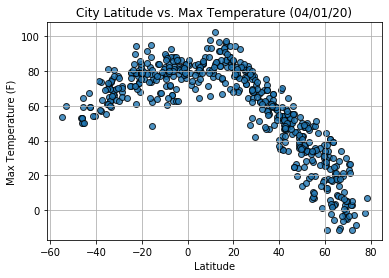

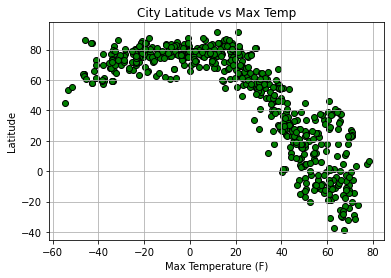

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(lat, max_temp, facecolors="green", edgecolors="black")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("City Latitude vs Max Temp")
plt.grid()


plt.show()
plt.savefig("Lat vs Max Temp.png")

## Latitude vs. Humidity Plot

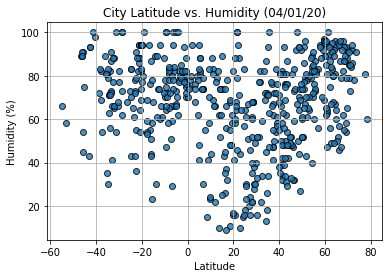

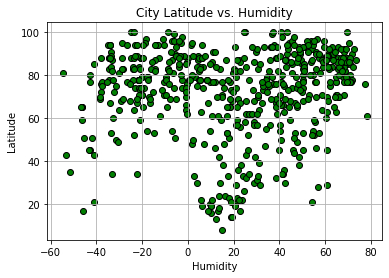

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(lat,humid, facecolors="green", edgecolors = "black")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.grid()

plt.show()
plt.savefig("Lat vs Humidity.png")

## Latitude vs. Cloudiness Plot

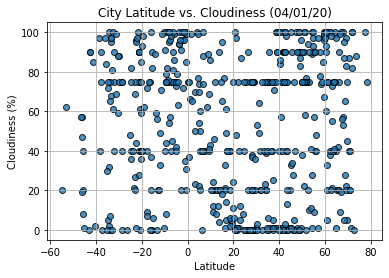

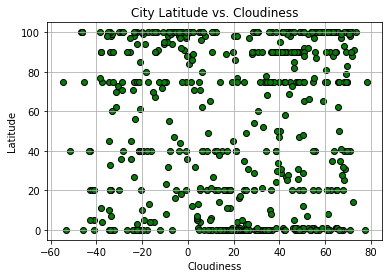

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(lat,cloudiness, facecolors="green", edgecolors = "black")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

plt.show()
plt.savefig("Lat vs cloudiness.png")

## Latitude vs. Wind Speed Plot

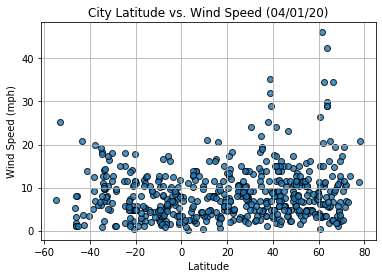

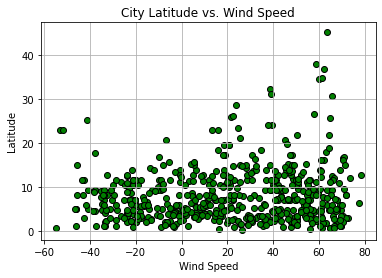

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(lat,wind_speed, facecolors="green", edgecolors = "black")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

plt.show()
plt.savefig("lat vs windspeed.png")

## Linear Regression

In [23]:
north_city = weather_df.loc[weather_df["Lat"] >= 0]
south_city = weather_df.loc[weather_df["Lat"] < 0]
south_city

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lüderitz,-26.6481,15.1594,66.42,77,0,11.07,NA,1613253100
1,Cape Town,-33.9258,18.4232,70.00,94,20,4.61,ZA,1613253060
2,Vilhena,-12.7406,-60.1458,75.20,88,75,9.22,BR,1613253100
6,Bengkulu,-3.8004,102.2655,77.11,84,100,5.01,ID,1613253101
7,Hobart,-42.8794,147.3294,57.99,77,20,8.05,AU,1613253101
...,...,...,...,...,...,...,...,...,...
560,Upington,-28.4478,21.2561,80.60,69,100,1.14,ZA,1613253240
562,Dondo,-19.6094,34.7431,80.60,94,40,3.44,MZ,1613253240
563,Port Keats,-14.2500,129.5500,80.94,82,100,8.57,AU,1613253241
564,Morros,-9.4467,-46.3003,77.76,71,23,3.29,BR,1613253241


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


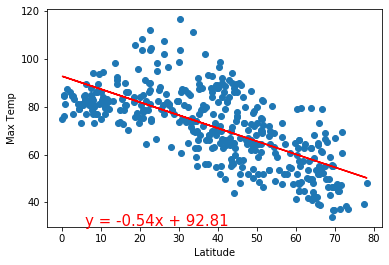

The r-squared is: 0.7733519668866403


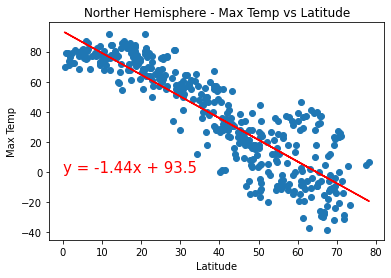

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = north_city["Lat"]
y_values = north_city["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Norther Hemisphere - Max Temp vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Northern temp vs lat.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


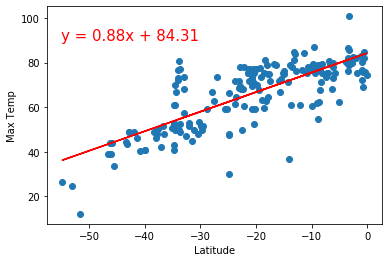

The r-squared is: 0.2533706688557154


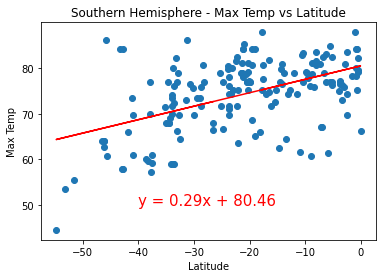

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = south_city["Lat"]
y_values = south_city["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Southern temp vs lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


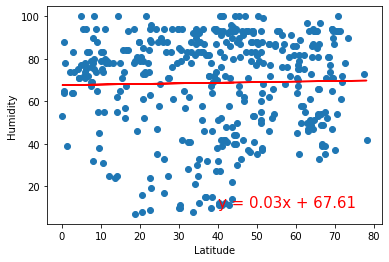

The r-squared is: 0.1226249573287576


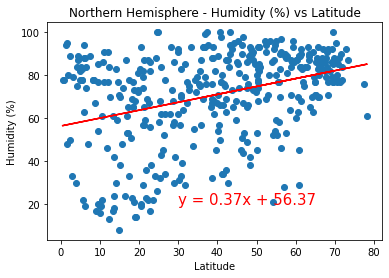

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = north_city["Lat"]
y_values = north_city["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("northern humidity vs lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


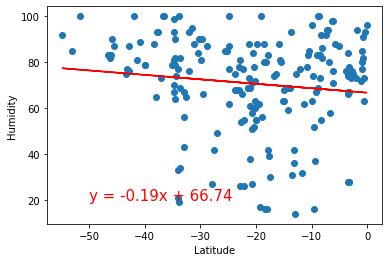

The r-squared is: 0.12000600621934764


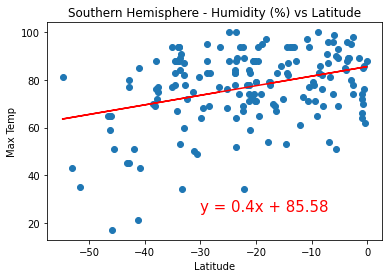

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = south_city["Lat"]
y_values = south_city["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Humidity (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("southern humid vs lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


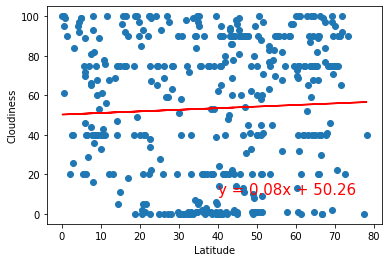

The r-squared is: 0.0794357713223138


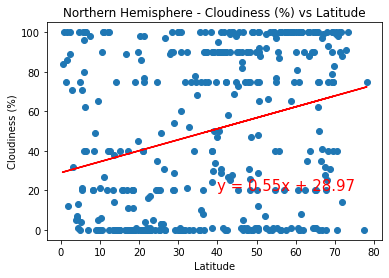

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = north_city["Lat"]
y_values = north_city["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("northern cloudiness vs lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


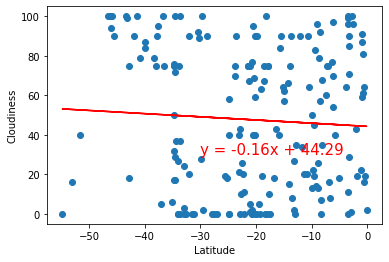

The r-squared is: 0.0565036654105234


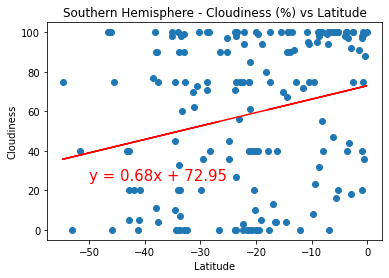

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = south_city["Lat"]
y_values = south_city["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("southern cloudiness vs lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


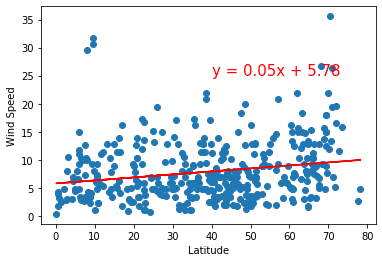

The r-squared is: 0.0005895672192489828


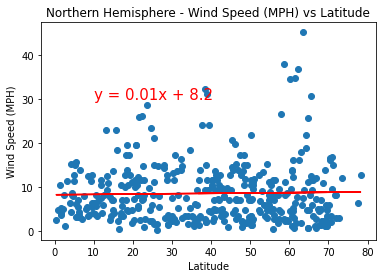

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = north_city["Lat"]
y_values = north_city["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Northern Hemisphere - Wind Speed (MPH) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("northern windspeed vs lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


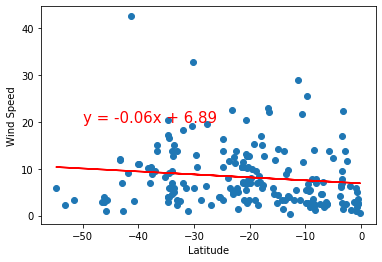

The r-squared is: 0.012634877089406566


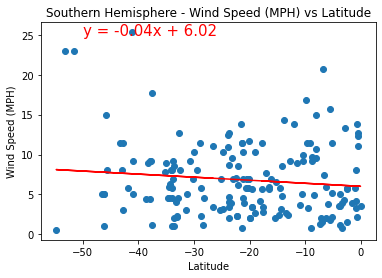

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = south_city["Lat"]
y_values = south_city["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Southern Hemisphere - Wind Speed (MPH) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("southern windspeed vs lat.png")